<a href="https://colab.research.google.com/github/garfield-gray/NeuralNetwork/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import tensorflow as tf

import sklearn as sl
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb


# problem 2

In [ ]:
d = datasets.load_breast_cancer()
x = d.data
y = d.target

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Shape of the training set:'+" "+str(x_train.shape))
print('Size of the training set:'+" "+str(x_train.shape[0]))

print('Shape of the testing set:'+" "+str(x_test.shape))
print('Size of the testing set:'+" "+str(x_test.shape[0]))

Shape of the training set: (455, 30)
Size of the training set: 455
Shape of the testing set: (114, 30)
Size of the testing set: 114


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


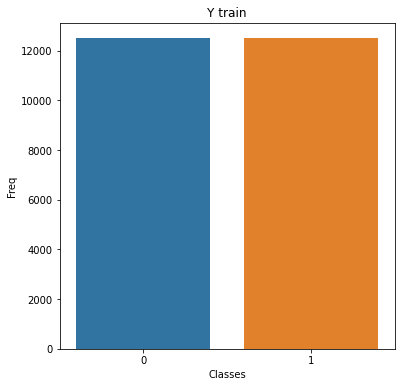

In [40]:
plt.figure(figsize = (6,6))
sb.countplot(y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32 ,activation='relu',input_shape=(30,)),
    tf.keras.layers.Dense(32 ,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def L(epoch , Ir):
  if epoch < 2:
    return Ir
  else:
    return Ir*np.exp(-0.2)
  
E = tf.keras.callbacks.EarlyStopping(patience=3 , monitor = 'val_acc')
L = tf.keras.callbacks.LearningRateScheduler(L)

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train , validation_split=0.1,epochs=100,batch_size=32, callbacks=[E, L])

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 2.2936 - accuracy: 0.6993 - val_loss: 1.6019 - val_accuracy: 0.7826 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5219 - accuracy: 0.8778 - val_loss: 0.7831 - val_accuracy: 0.8478 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5346 - accuracy: 0.8949 - val_loss: 0.5863 - val_accuracy: 0.8913 - lr: 8.1873e-04
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3537 - accuracy: 0.9169 - val_loss: 0.6286 - val_accuracy: 0.8478 - lr: 6.7032e-04
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3455 - accuracy: 0.9144 - val_loss: 0.3807 - val_accuracy: 0.8913 - lr: 5.4881e-04
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2951 - accuracy: 0.9144 - val_loss: 0.3544 - val_accuracy: 0.8913 - lr: 4.4933e-04
Epoch 7/100
13/13 [==============================] - 0s 6ms

In [ ]:
y_pred_float = model.predict_step(x_test)  
y_pred = np.round(y_pred_float)

In [ ]:
target_list=['benign','malignant']
sl.metrics.classification_report(y_true=y_test,y_pred=y_pred,output_dict = True,target_names=target_list)

{'accuracy': 0.9298245614035088,
 'benign': {'f1-score': 0.9130434782608695,
  'precision': 0.9333333333333333,
  'recall': 0.8936170212765957,
  'support': 47},
 'macro avg': {'f1-score': 0.9271099744245523,
  'precision': 0.9304347826086956,
  'recall': 0.9244204509368052,
  'support': 114},
 'malignant': {'f1-score': 0.9411764705882353,
  'precision': 0.927536231884058,
  'recall': 0.9552238805970149,
  'support': 67},
 'weighted avg': {'f1-score': 0.9295777807690582,
  'precision': 0.9299262649377066,
  'recall': 0.9298245614035088,
  'support': 114}}

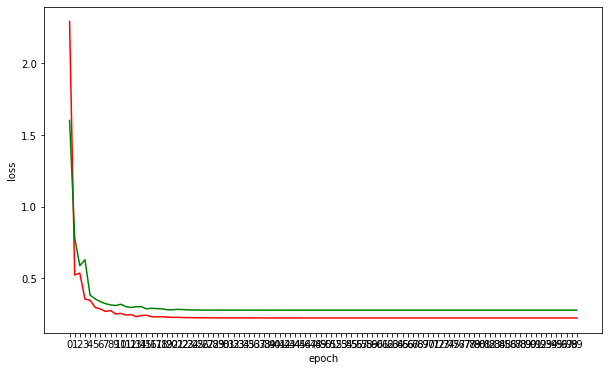

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = 'train', color='r')
plt.plot(history.history['val_loss'], label = 'validation', color='g')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xticks(np.arange(0, 100, 1))
plt.show()

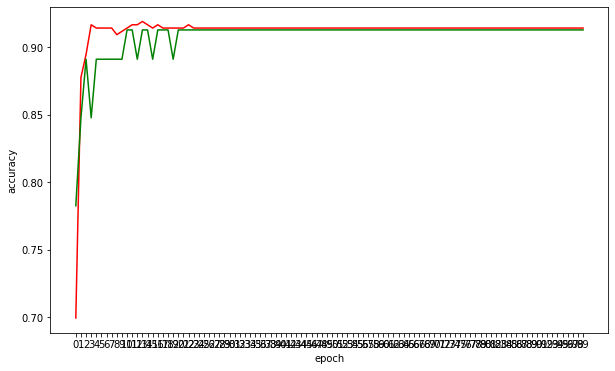

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'train', color='r')
plt.plot(history.history['val_accuracy'], label = 'validation', color='g')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xticks(np.arange(0, 100, 1))
plt.show()

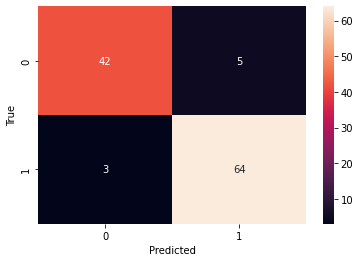

In [ ]:
CM = sl.metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)
sb.heatmap(CM,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# problem 3

In [48]:
(X_train,Y_train), (X_test, Y_test) = tf.keras.datasets.imdb.load_data(num_words = 15000)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


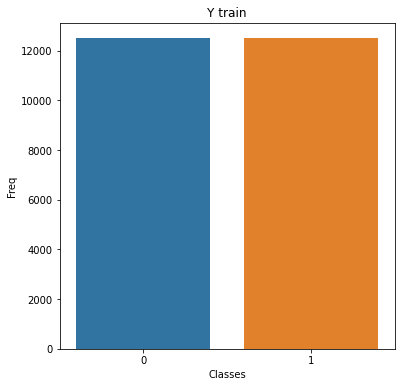

In [49]:
plt.figure(figsize = (6,6))
sb.countplot(Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")
plt.show()

In [57]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN,Dense, Activation
from keras.preprocessing.sequence import pad_sequences

In [58]:
rnn = Sequential()
rnn.add(Embedding(15000, 32, input_length = len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape = (15000, 130), return_sequences = False, activation = "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 218, 32)           480000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
X_train = pad_sequences(X_train, maxlen = 130)
X_test = pad_sequences(X_test, maxlen = 130)

In [60]:
history = rnn.fit(X_train, Y_train, validation_data = (X_test, Y_test),epochs = 20, batch_size = 128, verbose = 1)

Epoch 1/20


ValueError: ignored